In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
X = np.loadtxt('./data/data_quality.txt', delimiter = ',')

In [3]:
plt.figure()

In [4]:
plt.scatter(X[:, 0], X[:, 1], color = 'black', s = 80, marker = 'o', facecolors = 'none')

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [6]:
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

In [7]:
scores = []
values = np.arange(2, 10)

In [8]:
for num_clusters in values:
    kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
    kmeans.fit(X)
    
    score = metrics.silhouette_score(X, kmeans.labels_,
                                     metric = 'euclidean', sample_size = len(X) )
    
    print('Number of clusters = ', num_clusters)
    print('Silhouette score = ', score)
    scores.append(score)

Number of clusters =  2
Silhouette score =  0.477626248705
Number of clusters =  3
Silhouette score =  0.547174241173
Number of clusters =  4
Silhouette score =  0.579480188969
Number of clusters =  5
Silhouette score =  0.589003263565
Number of clusters =  6
Silhouette score =  0.609690411895
Number of clusters =  7
Silhouette score =  0.557765667045
Number of clusters =  8
Silhouette score =  0.497296680174
Number of clusters =  9
Silhouette score =  0.454743627175


In [9]:
plt.figure()
plt.bar(values, scores, width = 0.7, color = 'black', align = 'center')
plt.title('Silhouette score vs number of Clusters')

Text(0.5,1,'Silhouette score vs number of Clusters')

In [10]:
num_clusters = np.argmax(scores) + values[0]
print('Optimal number of clusters = ', num_clusters)

Optimal number of clusters =  6


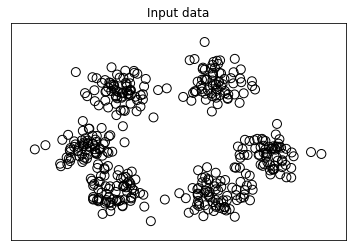

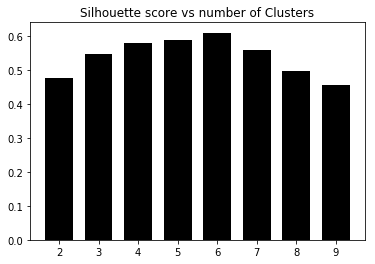

In [11]:
plt.show()